In [30]:
# import packages 
import os
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imsave
import matplotlib.pyplot as plt
import numpy as np

Total files:  8


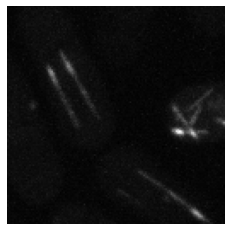

In [22]:
# paths and filenames 
path = os.getcwd()
path_images = path + "\\test_images\\"
file_names = os.listdir(path_images)
print("Total files:  {0}".format(len(file_names)))
# read in the first image from the list of files
img = io.imread(path_images+file_names[3])
plt.imshow(img, cmap="gray");
plt.axis("off");

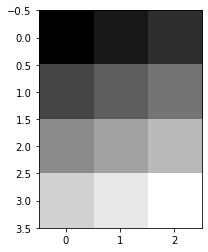

In [23]:
input_array = np.arange(12).reshape(4,3)
plt.imshow(input_array, cmap="gray");

In [31]:
class datAugmentation: 
    def __init__(self, im, title = None):
        self.input = im
        self.title = title 
        self.n_rows = im.shape[0]
        self.n_cols = im.shape[1]
        self.row_range = np.arange(self.n_rows)
        self.row_range_inv = np.flip(self.row_range)
        self.col_range = np.arange(self.n_cols)
        self.col_range_inv = np.flip(self.col_range)
    
    def rotate90(self):
        self.res90 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            self.res90[:,col_ind] = vals 

    def rotate180(self):
        self.res180 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range: 
            vals = self.input[row,:]
            vals = np.flip(vals)
            row_ind = self.row_range_inv[row]
            self.res180[row_ind,:] = vals

    def rotate270(self):
        self.res270 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range: 
            vals = self.input[row,:]
            vals = np.flip(vals)
            col_ind = row
            self.res270[:,col_ind] = vals

    def flip_horizontal(self):
        self.res_horiz_flip = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range:
            vals = self.input[row,:]
            vals = np.flip(vals)
            self.res_horiz_flip[row,:] = vals

    def flip_vertical(self):
        self.res_vert_flip = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range:
            vals = self.input[row,:]
            row_ind = self.row_range_inv[row]
            self.res_vert_flip[row_ind,:] = vals
    
    def rotate90_flip_horizontal(self):
        tmp_res = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            tmp_res[:,col_ind] = vals
        self.res_rot_flip_horiz = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.col_range:
            vals = tmp_res[row,:]
            vals = np.flip(vals)
            self.res_rot_flip_horiz[row,:] = vals
        
    def rotate90_flip_vertical(self):
        tmp_res = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            tmp_res[:,col_ind] = vals
        self.res_rot_flip_vert = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.col_range:
            vals = tmp_res[row,:]
            row_ind = self.col_range_inv[row]
            self.res_rot_flip_vert[row_ind,:] = vals
                
    def show_all_transformations(self):
        subplots = ["input", "res90", "res180", "res270", "res_horiz_flip", 
                    "res_vert_flip", "res_rot_flip_horiz", "res_rot_flip_vert"]
        plt.figure(figsize=(12,7))
        for i in range(len(subplots)):
            method = subplots[i]
            plt.subplot(2, 4, i+1)
            plt.imshow(getattr(self, method), cmap="gray")
            plt.axis("off")
            plt.title(method)

In [37]:
def write_ims(res_array, title, aug_type, dest_path):
    full_path = dest_path+title+"-"+aug_type+".tif"
    io.imsave(full_path, res_array)

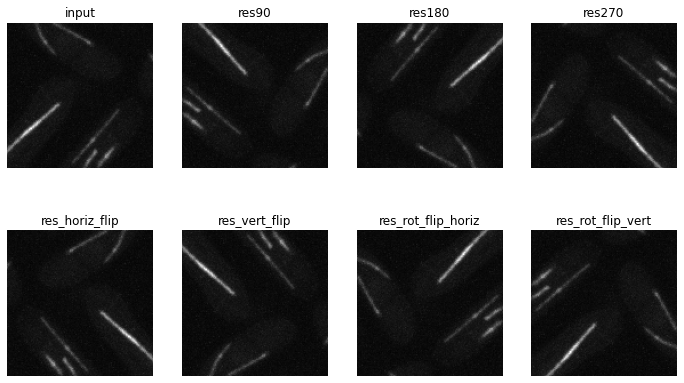

In [33]:
a = datAugmentation(img)
a.rotate90()
a.rotate180()
a.rotate270()
a.flip_vertical()
a.flip_horizontal()
a.rotate90_flip_horizontal()
a.rotate90_flip_vertical()

a.show_all_transformations()

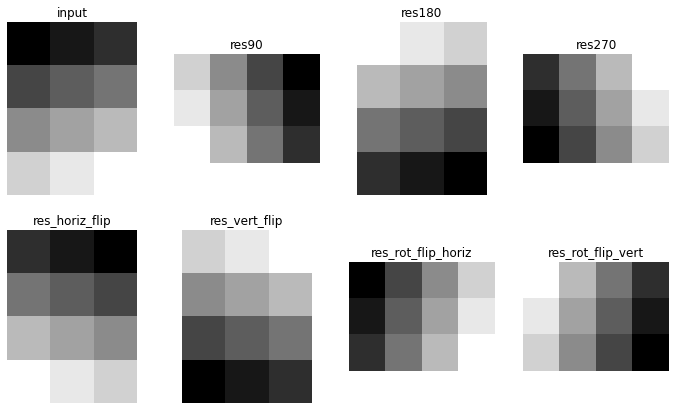

In [34]:
test_array = np.arange(12).reshape(4,3)
b = datAugmentation(test_array)
b.rotate90()
b.rotate180()
b.rotate270()
b.flip_vertical()
b.flip_horizontal()
b.rotate90_flip_horizontal()
b.rotate90_flip_vertical()

b.show_all_transformations()

In [38]:
all_augmentations = ["input", "res90", "res180", "res270", "res_horiz_flip", 
                     "res_vert_flip", "res_rot_flip_horiz", "res_rot_flip_vert"]
for im_ind in range(len(file_names)):
    img = io.imread(path_images+file_names[im_ind])
    aug = datAugmentation(img, file_names[im_ind])
    aug.rotate90()
    aug.rotate180()
    aug.rotate270()
    aug.flip_vertical()
    aug.flip_horizontal()
    aug.rotate90_flip_horizontal()
    aug.rotate90_flip_vertical()

    for au_t in range(len(all_augmentations)):
        method = all_augmentations[au_t]
        filename = aug.title
        filename = filename.replace(".tif", "")
        write_ims(getattr(aug, method), filename, method, path+"/augmented_test/")

print("files saved!")

files saved!


C:\Users\sedar\AppData\Local\Temp\ipykernel_15524\3686385105.py:3: UserWarning: C:\Users\sedar\Documents\Seda_Radoykova\fitting_lines\Unet\python_notebooks/augmented_test/raw-1-input.tif is a low contrast image
  io.imsave(full_path, res_array)
C:\Users\sedar\AppData\Local\Temp\ipykernel_15524\3686385105.py:3: UserWarning: C:\Users\sedar\Documents\Seda_Radoykova\fitting_lines\Unet\python_notebooks/augmented_test/raw-2-input.tif is a low contrast image
  io.imsave(full_path, res_array)
C:\Users\sedar\AppData\Local\Temp\ipykernel_15524\3686385105.py:3: UserWarning: C:\Users\sedar\Documents\Seda_Radoykova\fitting_lines\Unet\python_notebooks/augmented_test/raw-3-input.tif is a low contrast image
  io.imsave(full_path, res_array)
C:\Users\sedar\AppData\Local\Temp\ipykernel_15524\3686385105.py:3: UserWarning: C:\Users\sedar\Documents\Seda_Radoykova\fitting_lines\Unet\python_notebooks/augmented_test/raw-4-input.tif is a low contrast image
  io.imsave(full_path, res_array)
